In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df = pd.read_csv("test (2).csv")

In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
test_df.shape

(1459, 80)

In [9]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df = pd.read_csv("sample_submission.csv")

In [12]:
df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [13]:
df.shape

(1459, 2)

In [14]:
test_df = test_df.merge(df)

In [15]:
test_df.shape

(1459, 81)

In [16]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [17]:
final_df = train_df.append(test_df)

C:\Users\AVITA\AppData\Local\Temp\ipykernel_8148\714863615.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = train_df.append(test_df)


In [18]:
final_df.shape

(2919, 81)

In [19]:
final_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.866657


In [20]:
final_df['SalePrice'].tail()

1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, dtype: float64

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [23]:
final_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.011630
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.087910
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.318084
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.296497
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.550911
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.065785
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.362066
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.350032
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.355608
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.272202


<AxesSubplot:>

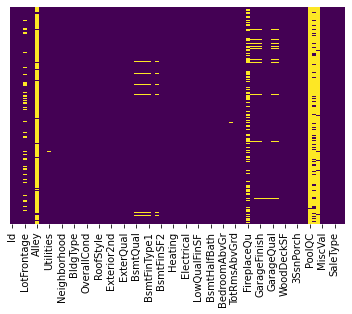

In [24]:
sns.heatmap(final_df.isnull(),yticklabels = False,cbar=False,cmap='viridis')

C:\Users\AVITA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


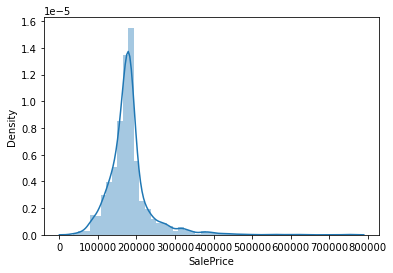

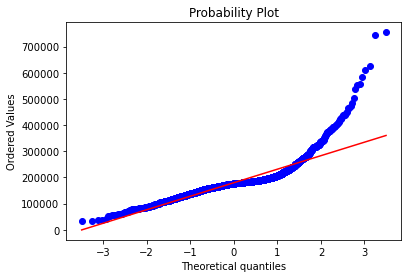

In [25]:
import scipy.stats as stats
sns.distplot(final_df['SalePrice']);
fig = plt.figure()
res = stats.probplot(final_df['SalePrice'], plot=plt)


C:\Users\AVITA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


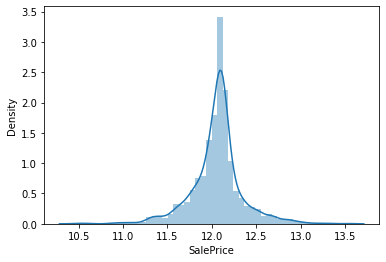

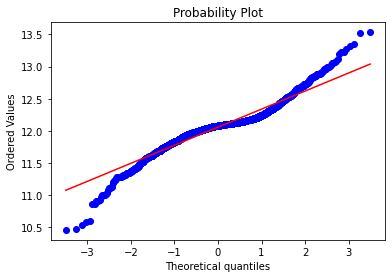

In [26]:
final_df['SalePrice'] = np.log(final_df['SalePrice'])
sns.distplot(final_df['SalePrice']);
fig = plt.figure()
res = stats.probplot(final_df['SalePrice'], plot=plt)


C:\Users\AVITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

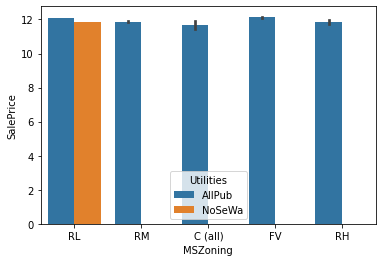

In [27]:
sns.barplot('MSZoning','SalePrice',hue ='Utilities' ,data = final_df)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

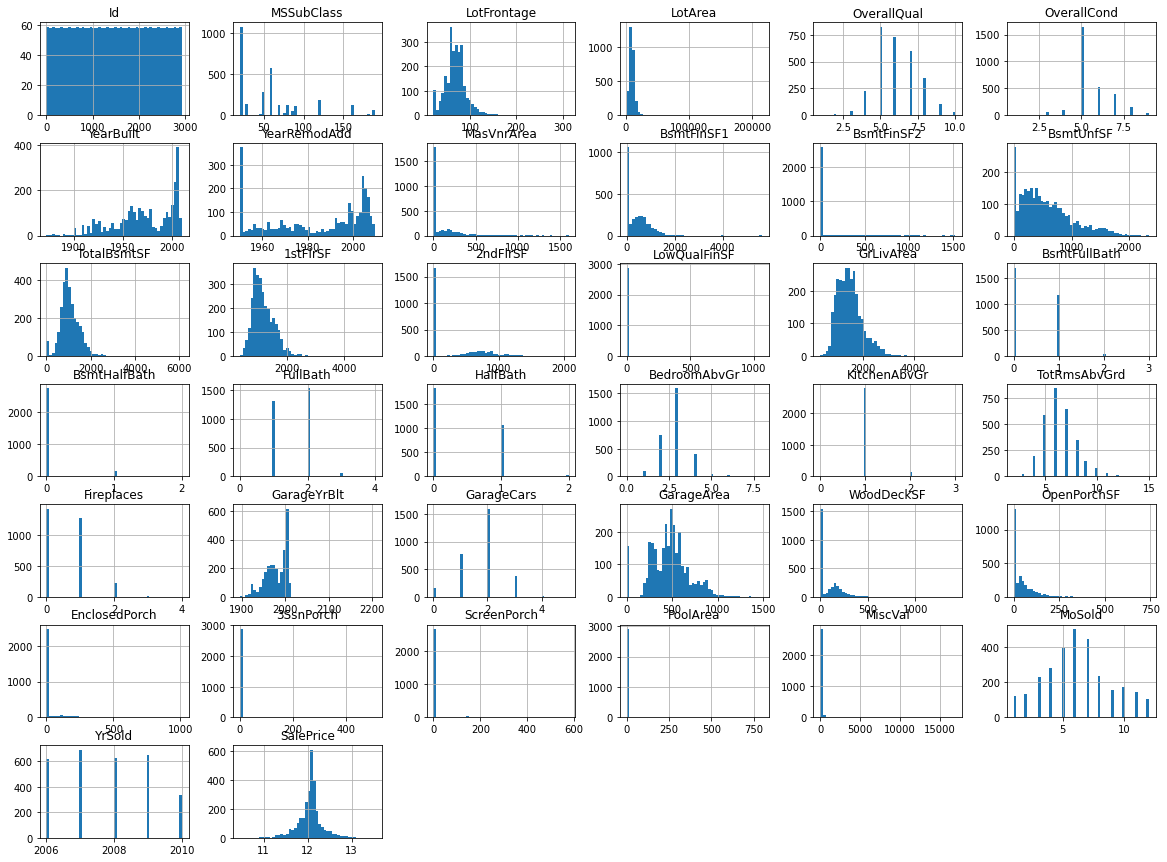

In [28]:
final_df.hist(bins =50,figsize=(20,15))

In [29]:
final_df['SalePrice'].value_counts()

11.849398    20
11.813030    17
11.951180    14
11.884489    14
12.154779    13
             ..
12.121927     1
12.009322     1
12.106146     1
12.358755     1
12.142823     1
Name: SalePrice, Length: 2101, dtype: int64

In [30]:
final_df['SalePrice'].isnull().sum()

0

In [31]:
final_df['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [32]:
final_df['SaleCondition'].isnull().sum()

0

# handling catgoriacal features

In [33]:
pd.get_dummies(final_df['SaleCondition'],drop_first = True)
final_df['SaleCondition'] = final_df['SaleCondition'].map({'Normal':1,'Partial':2,'Abnorml':3,'Family':4,'Alloca':5,'AdjLand':6})

In [46]:
final_df['SaleCondition'].value_counts()

1    2402
2     245
3     190
4      46
5      24
6      12
Name: SaleCondition, dtype: int64

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [48]:
# from sklearn.preprocessing import LabelEncoder
# LabelEncoder = LabelEncoder()

In [49]:
# final_df['SaleCondition']=LabelEncoder.fit_transform(final_df['SaleCondition'])

In [50]:
# final_df['SaleCondition'].value_counts()

In [51]:
# final_df['SaleCondition'] = pd.get_dummies(final_df['SaleCondition'])

In [52]:
final_df['SaleType'].value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [53]:
final_df['SaleType'].isnull().sum()

0

In [54]:
final_df['SaleType'] = final_df['SaleType'].fillna(final_df['SaleType'].value_counts().index[0])

In [55]:
final_df['SaleType'].isnull().sum()

0

In [56]:
pd.get_dummies(final_df['SaleType'],drop_first = True)
final_df['SaleType'] = final_df['SaleType'].map({'WD':1,'New':2,'COD':3,'ConLD':4,'CWD':5,'ConLI':6,'ConLw':7,'Oth':8,'Con':9})

In [57]:
final_df['SaleType'].value_counts()

1    2526
2     239
3      87
4      26
5      12
6       9
7       8
8       7
9       5
Name: SaleType, dtype: int64

In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [59]:
final_df['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [60]:
final_df['MiscFeature'].isnull().sum()

2814

In [61]:
final_df['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [62]:
final_df['Fence'].isnull().sum()

2348

In [63]:
final_df['PoolQC'].isnull().sum()

2909

In [64]:
final_df['PavedDrive'].isnull().sum()

0

In [65]:
final_df['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [66]:
pd.get_dummies(final_df['PavedDrive'],drop_first = True)
final_df['PavedDrive'] = final_df['PavedDrive'].map({'Y':0,'N':1,'P':2})

In [67]:
final_df['PavedDrive'].value_counts()

0    2641
1     216
2      62
Name: PavedDrive, dtype: int64

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [69]:
final_df['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [70]:
final_df['GarageCond'].isnull().sum()

159

In [71]:
final_df['GarageCond'] = final_df['GarageCond'].fillna(final_df['GarageCond'].value_counts().index[0])

In [72]:
final_df['GarageCond'].isnull().sum()

0

In [73]:
pd.get_dummies(final_df['GarageCond'],drop_first = True)
final_df['GarageCond'] = final_df['GarageCond'].map({'TA':1,'Fa':2,'Gd':3,'Po':4,'Ex':5})

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [75]:
final_df['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [76]:
final_df['GarageQual'].isnull().sum()

159

In [77]:
final_df['GarageQual'] = final_df['GarageQual'].fillna(final_df['GarageQual'].value_counts().index[0])

In [78]:
final_df['GarageQual'].isnull().sum()

0

In [79]:
pd.get_dummies(final_df['GarageQual'],drop_first = True)
final_df['GarageQual'] = final_df['GarageQual'].map({'TA':1,'Fa':2,'Gd':3,'Po':4,'Ex':5})

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [81]:
final_df['GarageArea'].value_counts()

0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
872.0       1
923.0       1
192.0       1
1025.0      1
272.0       1
Name: GarageArea, Length: 603, dtype: int64

In [82]:
final_df['GarageArea'].isnull().sum()

1

In [83]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['GarageArea']])
final_df[['GarageArea']] = imputer.transform(final_df[['GarageArea']])

In [84]:
# final_df['GarageArea'] = final_df['GarageArea'].fillna(final_df['GarageArea'].value_counts().index[0])

In [85]:
final_df['GarageArea'].isnull().sum()

0

In [86]:
final_df['GarageCars'].isnull().sum()

1

In [87]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['GarageCars']])
final_df[['GarageCars']] = imputer.transform(final_df[['GarageCars']])

In [88]:
# final_df['GarageCars'] = final_df['GarageCars'].fillna(final_df['GarageCars'].value_counts().index[0])

In [89]:
final_df['GarageCars'].isnull().sum()

0

In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [91]:
final_df['GarageFinish'].isnull().sum()

159

In [92]:
final_df['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [93]:
final_df['GarageFinish'] = final_df['GarageFinish'].fillna(final_df['GarageFinish'].value_counts().index[0])

In [94]:
final_df['GarageFinish'].isnull().sum()

0

In [95]:
pd.get_dummies(final_df['GarageFinish'],drop_first = True)
final_df['GarageFinish'] = final_df['GarageFinish'].map({'Unf':0,'RFn':1,'Fin':2})

In [96]:
final_df['GarageYrBlt'].value_counts()

2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: GarageYrBlt, Length: 103, dtype: int64

In [97]:
final_df['GarageYrBlt'].isnull().sum()

159

In [98]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['GarageYrBlt']])
final_df[['GarageYrBlt']] = imputer.transform(final_df[['GarageYrBlt']])

In [99]:
# final_df['GarageYrBlt'] = final_df['GarageYrBlt'].fillna(final_df['GarageYrBlt'].value_counts().index[0])

In [100]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [101]:
final_df['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [102]:
final_df['GarageType'].isnull().sum()

157

In [103]:
final_df['GarageType'] = final_df['GarageType'].fillna(final_df['GarageType'].value_counts().index[0])

In [104]:
pd.get_dummies(final_df['GarageType'],drop_first = True)
final_df['GarageType'] = final_df['GarageType'].map({'Attchd':1,'Detchd':2,'BuiltIn':3,'Basment':4,'2Types':5,'CarPort':6})

In [105]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [106]:
final_df['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [107]:
final_df['FireplaceQu'].isnull().sum()

1420

In [108]:
final_df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [109]:
final_df['Functional'].isnull().sum()

2

In [110]:
final_df['Functional'] = final_df['Functional'].fillna(final_df['Functional'].value_counts().index[0])

In [111]:
pd.get_dummies(final_df['Functional'],drop_first = True)
final_df['Functional'] = final_df['Functional'].map({'Typ':1,'Min2':2,'Min1':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7})

In [112]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [113]:
final_df['KitchenQual'].isnull().sum()

1

In [114]:
final_df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [115]:
final_df['KitchenQual'] = final_df['KitchenQual'].fillna(final_df['KitchenQual'].value_counts().index[0])

In [116]:
pd.get_dummies(final_df['KitchenQual'],drop_first = True)
final_df['KitchenQual'] = final_df['KitchenQual'].map({'TA':0,'Gd':1,'Ex':2,'Fa':3})

In [117]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [118]:
final_df['BsmtHalfBath'].isnull().sum()

2

In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['BsmtHalfBath']])
final_df[['BsmtHalfBath']] = imputer.transform(final_df[['BsmtHalfBath']])

In [120]:
final_df['BsmtHalfBath'] = final_df['BsmtHalfBath'].fillna(final_df['BsmtHalfBath'].value_counts().index[0])

In [121]:
final_df['BsmtFullBath'].isnull().sum()

2

In [122]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['BsmtFullBath']])
final_df[['BsmtFullBath']] = imputer.transform(final_df[['BsmtFullBath']])

In [123]:
final_df['BsmtFullBath'] = final_df['BsmtFullBath'].fillna(final_df['BsmtFullBath'].value_counts().index[0])

In [124]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [125]:
final_df['Electrical'].isnull().sum()

1

In [126]:
final_df['Electrical'] = final_df['Electrical'].fillna(final_df['Electrical'].value_counts().index[0])

In [127]:
final_df['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [128]:
pd.get_dummies(final_df['Electrical'],drop_first = True)
final_df['Electrical'] = final_df['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})

In [129]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [130]:
final_df['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [131]:
pd.get_dummies(final_df['CentralAir'],drop_first = True)
final_df['CentralAir'] = final_df['CentralAir'].map({'Y':0,'N':1})

In [132]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [133]:
final_df['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [134]:
pd.get_dummies(final_df['HeatingQC'],drop_first = True)
final_df['HeatingQC'] = final_df['HeatingQC'].map({'Ex':0,'TA':1,'Gd':2,'Fa':3,'Po':4})

In [135]:
final_df['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [136]:
pd.get_dummies(final_df['Heating'],drop_first = True)
final_df['Heating'] = final_df['Heating'].map({'GasA':0,'GasW':1,'Grav':2,'Wall':3,'OthW':4,'Floor':5})

In [137]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [138]:
final_df['TotalBsmtSF'].isnull().sum()

1

In [139]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['TotalBsmtSF']])
final_df[['TotalBsmtSF']] = imputer.transform(final_df[['TotalBsmtSF']])

In [140]:
final_df['BsmtUnfSF'].isnull().sum()

1

In [141]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['BsmtUnfSF']])
final_df[['BsmtUnfSF']] = imputer.transform(final_df[['BsmtUnfSF']])

In [142]:
final_df['BsmtFinSF2'].isnull().sum()

1

In [143]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['BsmtFinSF2']])
final_df[['BsmtFinSF2']] = imputer.transform(final_df[['BsmtFinSF2']])

In [144]:
# final_df['TotalBsmtSF'] = final_df['TotalBsmtSF'].fillna(final_df['TotalBsmtSF'].value_counts().index[0])
# final_df['BsmtUnfSF'] = final_df['BsmtUnfSF'].fillna(final_df['BsmtUnfSF'].value_counts().index[0])
# final_df['BsmtFinSF2'] = final_df['BsmtFinSF2'].fillna(final_df['BsmtFinSF2'].value_counts().index[0])

In [145]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [146]:
final_df['BsmtFinType2'].isnull().sum()

80

In [147]:
final_df['BsmtFinType2'] = final_df['BsmtFinType2'].fillna(final_df['BsmtFinType2'].value_counts().index[0])

In [148]:
final_df['BsmtFinType2'].value_counts()

Unf    2573
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [149]:
pd.get_dummies(final_df['BsmtFinType2'],drop_first = True)
final_df['BsmtFinType2'] = final_df['BsmtFinType2'].map({'Unf':0,'Rec':1,'LwQ':2,'BLQ':3,'ALQ':4,'GLQ':5})

In [150]:
final_df['BsmtFinSF1'].isnull().sum()

1

In [151]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['BsmtFinSF1']])
final_df[['BsmtFinSF1']] = imputer.transform(final_df[['BsmtFinSF1']])

In [152]:
# final_df['BsmtFinSF1'] = final_df['BsmtFinSF1'].fillna(final_df['BsmtFinSF1'].value_counts().index[0])

In [153]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [154]:
final_df['BsmtFinType1'].isnull().sum()

79

In [155]:
final_df['BsmtFinType1'] = final_df['BsmtFinType1'].fillna(final_df['BsmtFinType1'].value_counts().index[0])

In [156]:
final_df['BsmtFinType1'].value_counts()

Unf    930
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [157]:
pd.get_dummies(final_df['BsmtFinType1'],drop_first = True)
final_df['BsmtFinType1'] = final_df['BsmtFinType1'].map({'Unf':0,'GLQ':1,'ALQ':2,'Rec':3,'BLQ':4,'LwQ':5})

In [158]:
final_df['BsmtExposure'] = final_df['BsmtExposure'].fillna(final_df['BsmtExposure'].value_counts().index[0])

In [159]:
final_df['BsmtExposure'].value_counts()

No    1986
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [160]:
pd.get_dummies(final_df['BsmtExposure'],drop_first = True)
final_df['BsmtExposure'] = final_df['BsmtExposure'].map({'No':0,'Av':1,'Gd':2,'Mn':3})

In [161]:
final_df['BsmtCond'] = final_df['BsmtCond'].fillna(final_df['BsmtCond'].value_counts().index[0])

In [162]:
final_df['BsmtCond'].value_counts()

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [163]:
pd.get_dummies(final_df['BsmtCond'],drop_first = True)
final_df['BsmtCond'] = final_df['BsmtCond'].map({'TA':0,'Gd':1,'Fa':2,'Po':3})

In [164]:
final_df['BsmtQual'] = final_df['BsmtQual'].fillna(final_df['BsmtQual'].value_counts().index[0])

In [165]:
final_df['BsmtQual'].value_counts()

TA    1364
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [166]:
pd.get_dummies(final_df['BsmtQual'],drop_first = True)
final_df['BsmtQual'] = final_df['BsmtQual'].map({'TA':0,'Gd':1,'Ex':2,'Fa':3})

In [167]:
final_df['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [168]:
final_df['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [169]:
final_df['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [170]:
pd.get_dummies(final_df['Foundation'],drop_first = True)
final_df['Foundation'] = final_df['Foundation'].map({'PConc':0,'CBlock':1,'BrkTil':2,'Slab':3,'Stone':4,'Wood':5})

pd.get_dummies(final_df['ExterCond'],drop_first = True)
final_df['ExterCond'] = final_df['ExterCond'].map({'TA':0,'Gd':1,'Fa':2,'Ex':3,'Po':4})

pd.get_dummies(final_df['ExterQual'],drop_first = True)
final_df['ExterQual'] = final_df['ExterQual'].map({'TA':0,'Gd':1,'Ex':2,'Fa':3})

In [171]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [172]:
final_df['MasVnrArea'] = final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].value_counts().index[0])

In [173]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['MasVnrArea']])
final_df[['MasVnrArea']] = imputer.transform(final_df[['MasVnrArea']])

In [174]:
final_df['MasVnrType'] = final_df['MasVnrType'].fillna(final_df['MasVnrType'].value_counts().index[0])

In [175]:
final_df['MasVnrType'].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [176]:
pd.get_dummies(final_df['MasVnrType'],drop_first = True)
final_df['MasVnrType'] = final_df['MasVnrType'].map({'None':0,'BrkFace':1,'Stone':2,'BrkCmn':3})

In [177]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [178]:
final_df['Exterior2nd'] = final_df['Exterior2nd'].fillna(final_df['Exterior2nd'].value_counts().index[0])

In [179]:
final_df['Exterior2nd'].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [180]:
pd.get_dummies(final_df['Exterior2nd'],drop_first = True)
final_df['Exterior2nd'] = final_df['Exterior2nd'].map({'VinylSd':0,'MetalSd':1,'HdBoard':2,'Wd Sdng':3,'Plywood':4,'CmentBd':5,'Wd Shng':6,'BrkFace':7,'Stucco':8,'AsbShng':9,'Brk Cmn':10,'ImStucc':11,'Stone':12,'AsphShn':13,'CBlock':14,'Other':15})

In [181]:
final_df['Exterior1st'].isnull().sum()

1

In [182]:
final_df['Exterior1st'] = final_df['Exterior1st'].fillna(final_df['Exterior1st'].value_counts().index[0])

In [183]:
final_df['Exterior1st'].isnull().sum()

0

In [184]:
final_df['Exterior1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [185]:
pd.get_dummies(final_df['Exterior1st'],drop_first = True)
final_df['Exterior1st'] = final_df['Exterior1st'].map({'VinylSd':0,'MetalSd':1,'HdBoard':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'WdShing':7,'AsbShng':8,'Stucco':9,'BrkComm':10,'AsphShn':11,'Stone':12,'CBlock':13,'ImStucc':14})

In [186]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [187]:
final_df['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [188]:
pd.get_dummies(final_df['RoofMatl'],drop_first = True)
final_df['RoofMatl'] = final_df['RoofMatl'].map({'CompShg':0,'Tar&Grv':1,'WdShake':2,'WdShngl':3,'Metal':4,'Membran':5,'Roll':6,'ClyTile':7})

In [189]:
final_df['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [190]:
pd.get_dummies(final_df['RoofStyle'],drop_first = True)
final_df['RoofStyle'] = final_df['RoofStyle'].map({'Gable':0,'Hip':1,'Gambrel':2,'Flat':3,'Mansard':4,'Shed':5})

In [191]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [192]:
final_df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [193]:
pd.get_dummies(final_df['HouseStyle'],drop_first = True)
final_df['HouseStyle'] = final_df['HouseStyle'].map({'1Story':0,'2Story':1,'1.5Fin':2,'SLvl':3,'SFoyer':4,'2.5Unf':5,'1.5Unf':6,'2.5Fin':7})

In [194]:
final_df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [195]:
pd.get_dummies(final_df['BldgType'],drop_first = True)
final_df['BldgType'] = final_df['BldgType'].map({'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4})

In [196]:
final_df['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [197]:
pd.get_dummies(final_df['Condition2'],drop_first = True)
final_df['Condition2'] = final_df['Condition2'].map({'Norm':0,'Feedr':1,'Artery':2,'PosN':3,'PosA':4,'RRNn':5,'RRAn':6,'RRAe':7})

In [198]:
final_df['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [199]:
pd.get_dummies(final_df['Condition1'],drop_first = True)
final_df['Condition1'] = final_df['Condition1'].map({'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7,'RRNe':8})

In [200]:
final_df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [201]:
pd.get_dummies(final_df['LandSlope'],drop_first = True)
final_df['LandSlope'] = final_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})

In [202]:
final_df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [203]:
pd.get_dummies(final_df['LotConfig'],drop_first = True)
final_df['LotConfig'] = final_df['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})

In [204]:
final_df['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [205]:
pd.get_dummies(final_df['LandContour'],drop_first = True)
final_df['LandContour'] = final_df['LandContour'].map({'Lvl':0,'HLS':1,'Bnk':2,'Low':3})

In [206]:
final_df['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [207]:
pd.get_dummies(final_df['LotShape'],drop_first = True)
final_df['LotShape'] = final_df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [208]:
final_df['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [209]:
pd.get_dummies(final_df['Street'],drop_first = True)
final_df['Street'] = final_df['Street'].map({'Pave':0,'Grvl':1})

In [210]:
final_df['Utilities'].isnull().sum()

2

In [211]:
final_df['Utilities'] = final_df['Utilities'].fillna(final_df['Utilities'].value_counts().index[0])

In [212]:
final_df['Utilities'].isnull().sum()

0

In [213]:
final_df['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [214]:
pd.get_dummies(final_df['Utilities'],drop_first = True)
final_df['Utilities'] = final_df['Utilities'].map({'AllPub':0,'NoSeWa':1})

In [215]:
final_df['LotFrontage'].isnull().sum()

486

In [216]:
final_df['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [217]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean',missing_values = np.nan)
imputer = imputer.fit(final_df[['LotFrontage']])
final_df[['LotFrontage']] = imputer.transform(final_df[['LotFrontage']])

In [218]:
final_df['LotFrontage'].isnull().sum()

0

In [219]:
final_df['MSZoning'].isnull().sum()

4

In [220]:
final_df['MSZoning'] = final_df['MSZoning'].fillna(final_df['MSZoning'].value_counts().index[0])

In [221]:
final_df['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [222]:
pd.get_dummies(final_df['MSZoning'],drop_first = True)
final_df['MSZoning'] = final_df['MSZoning'].map({'RL':0,'RM':1,'FV':2,'RH':3,'C (all)':4})

In [223]:
final_df['Neighborhood'].isnull().sum()

0

In [224]:
final_df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [225]:
pd.get_dummies(final_df['Neighborhood'],drop_first = True)
final_df['Neighborhood'] = final_df['Neighborhood'].map({'NAmes':0,'CollgCr':1,'OldTown':2,'Edwards':3,'Somerst':4,'NridgHt':5,'Gilbert':6,'Sawyer':7,'NWAmes':8,'SawyerW':9,'Mitchel':10,'BrkSide':11,'Crawfor':12,'IDOTRR':13,'Timber':14,'NoRidge':15,'StoneBr':16,'SWISU':17,'ClearCr':18,'MeadowV':19,'BrDale':20,'Blmngtn':21,'Veenker':22,'NPkVill':23,'Blueste':24})

In [226]:
final_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [227]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [228]:
final_df.drop(['GarageCond','GarageQual','GarageYrBlt', 'GarageFinish','GarageType','Electrical','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtExposure','BsmtQual','MasVnrType','MasVnrArea','LotFrontage','MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],axis=1,inplace = True)

In [229]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   LotShape       2919 non-null   int64  
 6   LandContour    2919 non-null   int64  
 7   Utilities      2919 non-null   int64  
 8   LotConfig      2919 non-null   int64  
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   int64  
 11  Condition1     2919 non-null   int64  
 12  Condition2     2919 non-null   int64  
 13  BldgType       2919 non-null   int64  
 14  HouseStyle     2919 non-null   int64  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [230]:
final_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [231]:
final_df.drop(["MSSubClass","LotShape",'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1','BldgType','HouseStyle'],axis=1,inplace=True)

In [232]:
# # get corrosponding columns
# cols = final_df.columns[logical_index]

# # use the columns  list to index the data frame
# final_df_sub = final_df[cols]

# final_df_sub.head()

In [233]:
# final_df.drop(['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','RoofMatl','Exterior1st','ExterQual', 'ExterCond','BsmtFinSF2', 'BsmtUnfSF','HeatingQC','1stFlrSF', '2ndFlrSF', 'LowQualFinSF'],axis=1,inplace=True)

In [234]:
# final_df.drop(['GrLivArea', 'BsmtFullBath','FullBath','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','Functional', 'Fireplaces', 'GarageCars','GarageArea', 'PavedDrive','OpenPorchSF','SaleType','SaleCondition'],axis=1,inplace=True)

In [235]:
final_df.isnull().sum()

Id               0
MSZoning         0
LotArea          0
Street           0
Condition2       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
final_df.describe()

,Id,MSZoning,LotArea,Street,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,0.313806,10168.114080,0.004111,0.025351,6.089072,5.564577,1971.312778,1984.264474,0.248030,...,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,1.247002,1.314834,12.058046
std,842.787043,0.683336,7886.996359,0.063996,0.301995,1.409947,1.113131,30.291442,20.894344,0.567701,...,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,0.830145,0.788381,0.291530
min,1.000000,0.000000,1300.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,10.460242
25%,730.500000,0.000000,7478.000000,0.000000,0.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1.000000,1.000000,11.949857
50%,1460.000000,0.000000,9453.000000,0.000000,0.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.000000,1.000000,12.082406
75%,2189.500000,0.000000,11570.000000,0.000000,0.000000,7.000000,6.000000,2001.000000,2004.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000,1.000000,12.164708
max,2919.000000,4.000000,215245.000000,1.000000,7.000000,10.000000,9.000000,2010.000000,2010.000000,5.000000,...,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,9.000000,6.000000,13.534473


<AxesSubplot:>

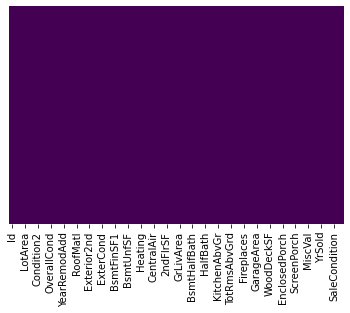

In [238]:
sns.heatmap(final_df.isnull(),yticklabels = False,cbar=False,cmap='viridis')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSZoning'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'Street'),
  Text(4, 0, 'Condition2'),
  Text(5, 0, 'OverallQual'),
  Text(6, 0, 'OverallCond'),
  Text(7, 0, 'YearBuilt'),
  Text(8, 0, 'YearRemodAdd'),
  Text(9, 0, 'RoofStyle'),
  Text(10, 0, 'RoofMatl'),
  Text(11, 0, 'Exterior1st'),
  Text(12, 0, 'Exterior2nd'),
  Text(13, 0, 'ExterQual'),
  Text(14, 0, 'ExterCond'),
  Text(15, 0, 'Foundation'),
  Text(16, 0, 'BsmtFinSF1'),
  Text(17, 0, 'BsmtFinSF2'),
  Text(18, 0, 'BsmtUnfSF'),
  Text(19, 0, 'TotalBsmtSF'),
  Text(20, 0, 'Heating'),
  Text(21, 0, 'HeatingQC'),
  Text(22, 0, 'CentralAir'),
  Text(23, 0, '1stFlrSF'),
  Text(24, 0, '2ndFlrSF'),
  Text(25, 0, 'LowQualFinSF'),
  Text(26, 0, 'GrLivArea'),
  Text(27

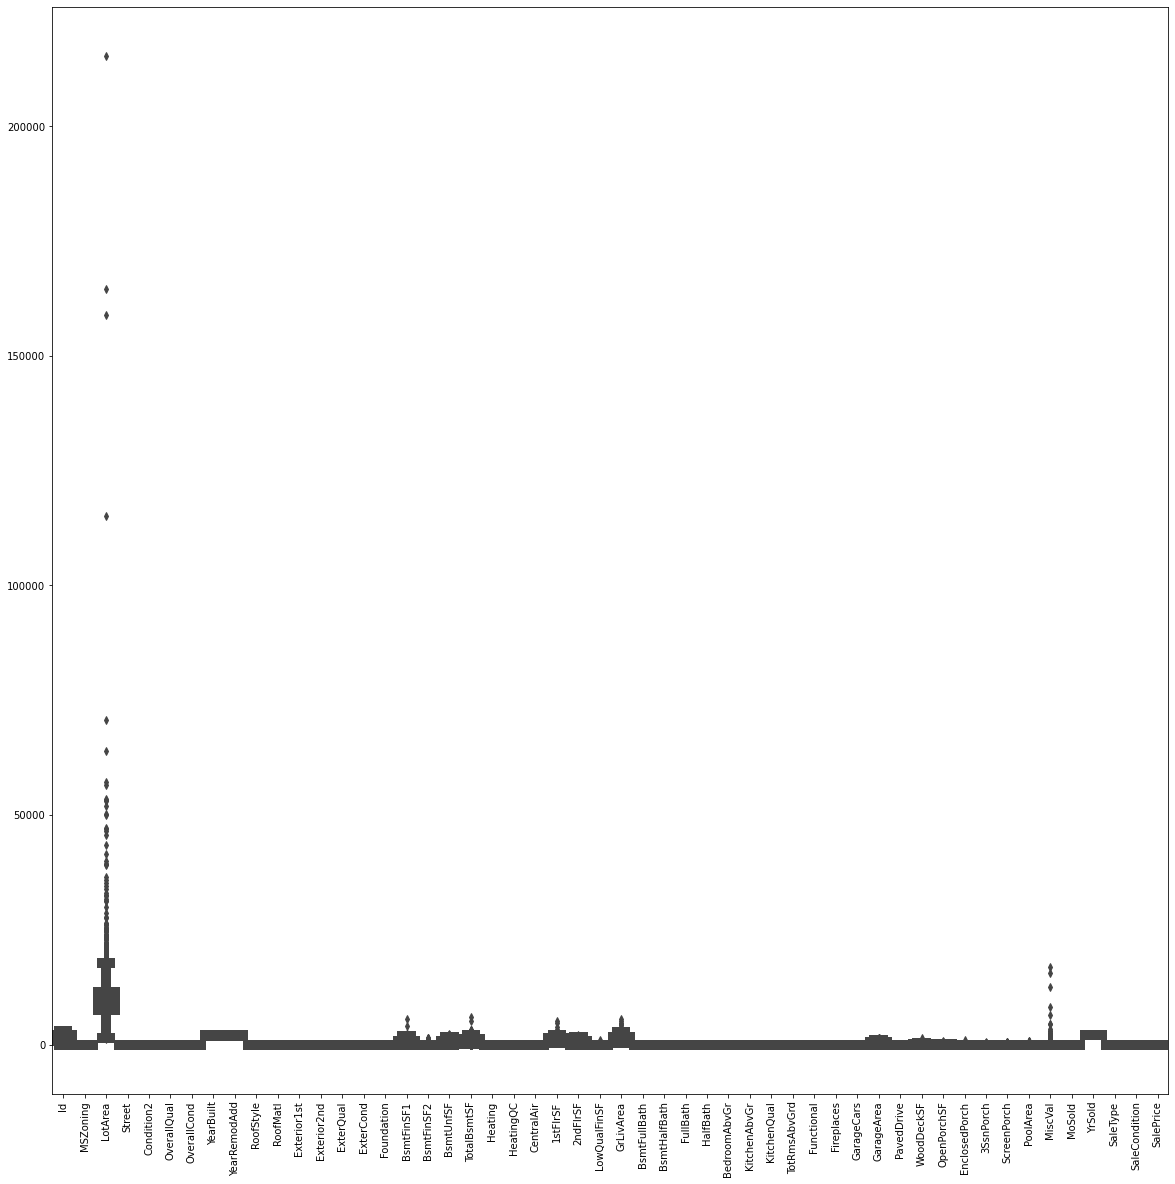

In [239]:
# Bosplot checking for outlier
figure = plt.figure(figsize=(20,20))
sns.boxplot(data = final_df,linewidth =10)
plt.xticks(rotation = 'vertical')

In [240]:
# idetifying outliers

In [241]:
# #identifying outliers

def outliers(final_df,ft):
    Q1=final_df[ft].quantile(0.25)
    Q3=final_df[ft].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    LS=final_df.index[(final_df[ft]<lower_bound)|(final_df[ft]>upper_bound)]
    
    return LS

In [242]:
# removing outliers

In [243]:
# #removing outliers

def remove(final_df,LS):
    LS=sorted(set(LS))
    final_df=final_df.drop(LS)
    
    return final_df

print("old data",final_df.shape)

old data (2919, 52)


In [244]:
index_list=[]
for feature in [
        'LotArea', 'MiscVal']:
    index_list.extend(outliers(final_df, feature))

final_df=remove(final_df, index_list)
print("new data shape",final_df.shape)

new data shape (2491, 52)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSZoning'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'Street'),
  Text(4, 0, 'Condition2'),
  Text(5, 0, 'OverallQual'),
  Text(6, 0, 'OverallCond'),
  Text(7, 0, 'YearBuilt'),
  Text(8, 0, 'YearRemodAdd'),
  Text(9, 0, 'RoofStyle'),
  Text(10, 0, 'RoofMatl'),
  Text(11, 0, 'Exterior1st'),
  Text(12, 0, 'Exterior2nd'),
  Text(13, 0, 'ExterQual'),
  Text(14, 0, 'ExterCond'),
  Text(15, 0, 'Foundation'),
  Text(16, 0, 'BsmtFinSF1'),
  Text(17, 0, 'BsmtFinSF2'),
  Text(18, 0, 'BsmtUnfSF'),
  Text(19, 0, 'TotalBsmtSF'),
  Text(20, 0, 'Heating'),
  Text(21, 0, 'HeatingQC'),
  Text(22, 0, 'CentralAir'),
  Text(23, 0, '1stFlrSF'),
  Text(24, 0, '2ndFlrSF'),
  Text(25, 0, 'LowQualFinSF'),
  Text(26, 0, 'GrLivArea'),
  Text(27

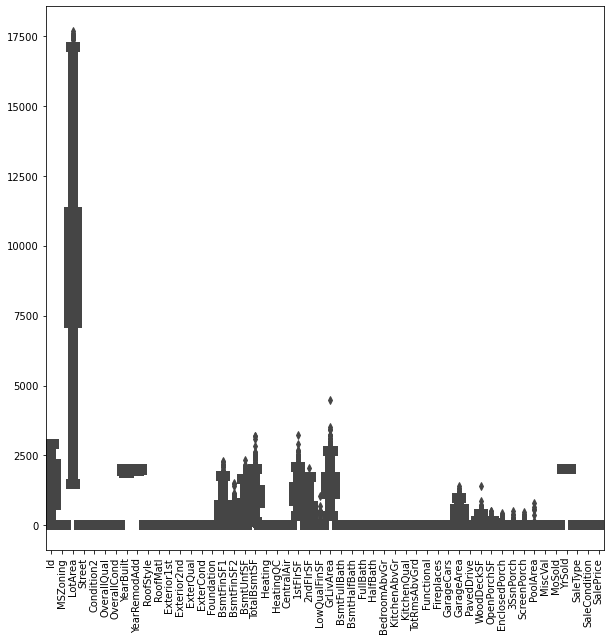

In [245]:
# # after removeing outliers
# # Bosplot checking for outlier
figure = plt.figure(figsize=(10,10))
sns.boxplot(data = final_df,linewidth =10)
plt.xticks(rotation = 'vertical')

In [246]:
final_df.head()

,Id,MSZoning,LotArea,Street,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0,8450,0,0,7,5,2003,2003,0,...,0,0,0,0,0,2,2008,1,1,12.247694
2,3,0,11250,0,0,7,5,2001,2002,0,...,0,0,0,0,0,9,2008,1,1,12.317167
3,4,0,9550,0,0,7,5,1915,1970,0,...,272,0,0,0,0,2,2006,1,3,11.849398
4,5,0,14260,0,0,8,5,2000,2000,0,...,0,0,0,0,0,12,2008,1,1,12.429216
8,9,1,6120,0,0,7,5,1931,1950,0,...,205,0,0,0,0,4,2008,1,3,11.774520


# divide into target variable(dependent varibale) and independent varibable

In [247]:
X = final_df.drop(final_df.columns[[-1]],axis=1)
y = final_df.iloc[:,-1]

In [248]:
X.head()

,Id,MSZoning,LotArea,Street,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,0,8450,0,0,7,5,2003,2003,0,...,61,0,0,0,0,0,2,2008,1,1
2,3,0,11250,0,0,7,5,2001,2002,0,...,42,0,0,0,0,0,9,2008,1,1
3,4,0,9550,0,0,7,5,1915,1970,0,...,35,272,0,0,0,0,2,2006,1,3
4,5,0,14260,0,0,8,5,2000,2000,0,...,84,0,0,0,0,0,12,2008,1,1
8,9,1,6120,0,0,7,5,1931,1950,0,...,0,205,0,0,0,0,4,2008,1,3


In [249]:
y.head()

0    12.247694
2    12.317167
3    11.849398
4    12.429216
8    11.774520
Name: SalePrice, dtype: float64

In [250]:
# Fill diagonal and upper half with NaNs
corr = X.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\AVITA\AppData\Local\Temp\ipykernel_8148\426866719.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Id,MSZoning,LotArea,Street,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MSZoning,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
LotArea,-0.03,-0.38,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Street,0.01,0.14,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Condition2,-0.02,0.01,0.02,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
OverallQual,-0.03,-0.10,0.23,-0.05,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
OverallCond,-0.00,0.00,-0.05,0.01,0.04,-0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
YearBuilt,-0.02,-0.18,0.13,-0.06,-0.03,0.61,-0.39,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
YearRemodAdd,-0.06,-0.04,0.11,-0.06,0.00,0.58,0.03,0.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
RoofStyle,-0.02,-0.06,0.15,-0.01,0.01,0.14,-0.00,0.00,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [251]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_final_df = pd.DataFrame()
vif_final_df["feature"] = X.columns
  
# calculating VIF for each feature
vif_final_df["VIF"] = [variance_inflation_factor(X.values, k) 
                           for k in range(len(X.columns))]
  
print(vif_final_df)

C:\Users\AVITA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0              Id  4.053823e+00
1        MSZoning  1.755519e+00
2         LotArea  1.497819e+01
3          Street  1.054088e+00
4      Condition2  1.041226e+00
5     OverallQual  7.034209e+01
6     OverallCond  4.757821e+01
7       YearBuilt  2.347734e+04
8    YearRemodAdd  2.303505e+04
9       RoofStyle  1.417287e+00
10       RoofMatl  1.080201e+00
11    Exterior1st  6.763551e+00
12    Exterior2nd  6.292642e+00
13      ExterQual  3.319246e+00
14      ExterCond  1.352302e+00
15     Foundation  4.084204e+00
16     BsmtFinSF1           inf
17     BsmtFinSF2           inf
18      BsmtUnfSF           inf
19    TotalBsmtSF           inf
20        Heating  1.217499e+00
21      HeatingQC  2.466138e+00
22     CentralAir  1.744746e+00
23       1stFlrSF           inf
24       2ndFlrSF           inf
25   LowQualFinSF           inf
26      GrLivArea           inf
27   BsmtFullBath  3.576330e+00
28   BsmtHalfBath  1.240917e+00
29       FullBath  2.619039e+01
30      

C:\Users\AVITA\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [252]:
# now we have to standerization make unit free variable

In [253]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scale = ss.fit_transform(X)

# devided in to train_test_split

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale, y, test_size = 0.20,random_state=42)

In [255]:
X_train.shape

(1992, 51)

In [256]:
X_test.shape

(499, 51)

In [257]:
y_train.shape

(1992,)

In [258]:
y_test.shape

(499,)

In [259]:
#Stats Model to fit
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
train = sm.OLS(y_train, X_train_sm).fit()
train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     47.42
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          1.25e-287
Time:                        23:54:18   Log-Likelihood:                 418.94
No. Observations:                1992   AIC:                            -739.9
Df Residuals:                    1943   BIC:                            -465.6
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0524      0.004   2700.439      0.000      12.044      12.061
x1             0.0405      0.005      8.686      0.000       0.031       0.050
x2            -0.0113      0.005     -2.129      0.033      -0.022      -0.001
x3             0.0323      0.006      5.567      0.000       0.021       0.044
x4             0.0100      0.004      2.233      0.026       0.001       0.019
x5            -0.0125      0.004     -3.037      0.002      -0.021      -0.004
x6             0.0322      0.009      3.786      0.000       0.016       0.049
x7             0.0298      0.006      5.157      0.000       0.018       0.041
x8             0.0461      0.011      4.356      0.000       0.025       0.067
x9             0.0098      0.007      1.400      0.162      -0.004       0.023
x10           -0.0017      0.005     -0.351      0.726      -0.011       0.008
x11           -0.0031      0.004     -0.722      0.470      -0.012       0.005
x12            0.0156      0.009      1.760      0.079      -0.002       0.033
x13           -0.0062      0.009     -0.712      0.476      -0.023       0.011
x14            0.0141      0.006      2.184      0.029       0.001       0.027
x15           -0.0054      0.005     -1.102      0.271      -0.015       0.004
x16           -0.0011      0.007     -0.161      0.872      -0.014       0.012
x17            0.0136      0.005      2.735      0.006       0.004       0.023
x18            0.0013      0.005      0.283      0.777      -0.008       0.010
x19            0.0050      0.004      1.156      0.248      -0.003       0.013
x20            0.0199      0.007      3.062      0.002       0.007       0.033
x21           -0.0228      0.005     -4.819      0.000      -0.032      -0.014
x22           -0.0026      0.005     -0.493      0.622      -0.013       0.008
x23           -0.0010      0.006     -0.184      0.854      -0.012       0.010
x24            0.0158      0.007      2.134      0.033       0.001       0.030
x25            0.0261      0.006      4.193      0.000       0.014       0.038
x26           -0.0022      0.005     -0.494      0.622      -0.011       0.007
x27            0.0350      0.007      5.094      0.000       0.022       0.049
x28            0.0030      0.006      0.470      0.638      -0.010       0.016
x29            0.0007      0.005      0.151      0.880      -0.009       0.010
x30            0.0084      0.007      1.126      0.260      -0.006       0.023
x31           -0.0037      0.007     -0.565      0.572      -0.017       0.009
x32            0.0115      0.007      1.640      0.101      -0.002       0.025
x33           -0.0170      0.005     -3.182      0.001      -0.027      -0.007
x34           -0.0016      0.006     -0.285      0.776      -0.013       0.009
x35            0.0312      0.009      3.341      0.001       0.013       0.050
x3

In [260]:
# making model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [261]:
LR.coef_

array([ 4.04509791e-02, -1.13085113e-02,  3.22350886e-02,  9.98571039e-03,
       -1.25340110e-02,  3.21974920e-02,  2.97841062e-02,  4.60861925e-02,
        9.76447281e-03, -1.70200024e-03, -3.10319793e-03,  1.55729663e-02,
       -6.18928767e-03,  1.40993167e-02, -5.44733365e-03, -1.06766709e-03,
       -5.81089925e+10, -2.18800541e+10, -5.82549492e+10,  5.55846389e+10,
       -2.28419708e-02, -2.62103326e-03, -1.00902449e-03,  3.22977498e+10,
        3.66120475e+10,  3.99390270e+09, -4.15729052e+10,  3.04914581e-03,
        6.73566692e-04,  8.43075913e-03, -3.69032619e-03,  1.15237128e-02,
       -1.70158200e-02, -1.58412731e-03,  3.12183789e-02, -5.03357159e-03,
        9.33782097e-03, -2.48711437e-03,  2.86879516e-02,  2.05980240e-03,
       -2.94775866e-03, -1.68766099e-03,  2.99083154e-03,  7.24700579e-03,
        1.02137726e-02,  7.48138088e-03, -4.57763672e-05,  1.80705038e-02,
        3.58390264e-03,  7.32806319e-03, -1.09296196e-03])

In [262]:
y_pred_train=LR.predict(X_train)
y_pred_test=LR.predict(X_test)

In [263]:
#  metrics
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_pred_train) 
test_mse = mean_squared_error(y_test,y_pred_test) 

In [264]:
train_mse

0.038446325502054006

In [265]:
test_mse

0.03863301706294982

In [266]:
RMSE_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
RMSE_train.round(2)
print("RMSE on Train: ", (RMSE_train).round(2))

RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
RMSE_test.round(2)
print("RMSE on Test: ", (RMSE_test).round(2))

RMSE on Train:  0.2
RMSE on Test:  0.2


In [267]:
LR.intercept_

12.052365850179433

In [268]:
LR.coef_

array([ 4.04509791e-02, -1.13085113e-02,  3.22350886e-02,  9.98571039e-03,
       -1.25340110e-02,  3.21974920e-02,  2.97841062e-02,  4.60861925e-02,
        9.76447281e-03, -1.70200024e-03, -3.10319793e-03,  1.55729663e-02,
       -6.18928767e-03,  1.40993167e-02, -5.44733365e-03, -1.06766709e-03,
       -5.81089925e+10, -2.18800541e+10, -5.82549492e+10,  5.55846389e+10,
       -2.28419708e-02, -2.62103326e-03, -1.00902449e-03,  3.22977498e+10,
        3.66120475e+10,  3.99390270e+09, -4.15729052e+10,  3.04914581e-03,
        6.73566692e-04,  8.43075913e-03, -3.69032619e-03,  1.15237128e-02,
       -1.70158200e-02, -1.58412731e-03,  3.12183789e-02, -5.03357159e-03,
        9.33782097e-03, -2.48711437e-03,  2.86879516e-02,  2.05980240e-03,
       -2.94775866e-03, -1.68766099e-03,  2.99083154e-03,  7.24700579e-03,
        1.02137726e-02,  7.48138088e-03, -4.57763672e-05,  1.80705038e-02,
        3.58390264e-03,  7.32806319e-03, -1.09296196e-03])

In [269]:
print("Train Accuracy R-Square:",LR.score(X_train, y_train)*100)

Train Accuracy R-Square: 53.94954225769385


In [270]:
print("Test Accuracy R-Square:",LR.score(X_test, y_test)*100)

Test Accuracy R-Square: 51.08176477572641


In [271]:
from sklearn.ensemble import RandomForestRegressor
RD = RandomForestRegressor(n_estimators=100,criterion='squared_error')
RD.fit(X_train,y_train)

RandomForestRegressor()

In [272]:
y_pred_train=RD.predict(X_train)
y_pred_test=RD.predict(X_test)

In [273]:
#  metrics
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_pred_train) 
test_mse = mean_squared_error(y_test,y_pred_test) 

In [274]:
train_mse

0.0013509305881161324

In [275]:
test_mse

0.007462099536051194

In [276]:
RMSE_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
RMSE_train.round(2)
print("RMSE on Train: ", (RMSE_train).round(2))

RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
RMSE_test.round(2)
print("RMSE on Test: ", (RMSE_test).round(2))

RMSE on Train:  0.04
RMSE on Test:  0.09


In [277]:
# [['OverallQual' '0.513638172174']
#  ['GrLivArea' '0.370362761174']
#  ['GarageCars' '0.363067861809']
#  ['KitchenQual' '0.333816397398']
#  ['ExterQual' '0.32876409725']
#  ['GarageArea' '0.288564418897']
#  ['TotalBsmtSF' '0.265984510681']
#  ['FullBath' '0.262270787714']
#  ['1stFlrSF' '0.261994730628']
#  ['YearBuilt' '0.259608433369']
#  ['YearRemodAdd' '0.19600822777']
#  ['Foundation' '0.195626580985']
#  ['TotRmsAbvGrd' '0.191502053325']
#  ['Fireplaces' '0.170319977323']
#  ['HeatingQC' '0.169955921911']
#  ['BsmtFinSF1' '0.131088111214']
#  ['MSZoning' '0.121486166688']
#  ['OverallCond' '0.113493734868']
#  ['2ndFlrSF' '0.108673750888']
#  ['LotShape' '0.0979153207264']
#  ['HalfBath' '0.0876808362195']
#  ['LotArea' '0.0875187368582']
#  ['SaleType' '0.0786177211471']
#  ['SaleCondition' '0.0746072717317']
#  ['BedroomAbvGr' '0.0676400172657']
#  ['CentralAir' '0.0639223060812']
#  ['MSSubClass' '0.0621486597']
#  ['OpenPorchSF' '0.0579227282531']
#  ['HouseStyle' '0.0506487336246']
#  ['BsmtUnfSF' '0.0504051652468']
#  ['PavedDrive' '0.0500237987487']
#  ['WoodDeckSF' '0.0470139180822']
#  ['Neighborhood' '0.0453362524159']
#  ['BldgType' '0.0430142365587']
#  ['Exterior2nd' '0.0319092961086']
#  ['LandContour' '0.0291469939656']
#  ['Exterior1st' '0.0270527763035']
#  ['ExterCond' '0.0231781019953']
#  ['BsmtFullBath' '0.0221592838941']
#  ['EnclosedPorch' '0.0210249814821']
#  ['KitchenAbvGr' '0.0173565501784']
#  ['LotConfig' '0.0162367914013']
#  ['Condition1' '0.0162277900568']
#  ['BsmtHalfBath' '0.0157235984376']
#  ['YrSold' '0.014816807328']
#  ['ScreenPorch' '0.0128727825063']
#  ['Heating' '0.0125773514626']
#  ['RoofStyle' '0.0114289829525']
#  ['RoofMatl' '0.00725502296313']
#  ['Functional' '0.00694497501364']
#  ['LandSlope' '0.00350433131895']
#  ['Condition2' '0.00154194016054']
#  ['LowQualFinSF' '0.000578977682803']
#  ['Street' '0.00032923710231']
#  ['3SsnPorch' '4.00990592686e-06']
#  ['Id' '0.0']
#  ['Utilities' '0.0']
#  ['BsmtFinSF2' '0.0']
#  ['PoolArea' '0.0']
#  ['MiscVal' '0.0']
#  ['MoSold' '0.0']]


In [278]:
print("Train Accuracy R-Square:",RD.score(X_train, y_train)*100)

Train Accuracy R-Square: 98.3818747006783


In [279]:
print("Test Accuracy R-Square:",RD.score(X_test, y_test)*100)

Test Accuracy R-Square: 90.55127535660236
